In [1]:
import otter
# nb_name should be the name of your notebook without the .ipynb extension
nb_name = "p13"
py_filename = nb_name + ".py"
grader = otter.Notebook(nb_name + ".ipynb")

In [2]:
import p13_test

In [3]:
# PLEASE FILL IN THE DETAILS
# enter none if you don't have a project partner
# you will have to add your partner as a group member on Gradescope even after you fill this

# project: p13
# submitter: ratushko
# partner: ppopuri  

 # Project 13: World University Rankings

## Learning Objectives:

In this project, you will demonstrate how to:

* query a database using SQL,
* process data using `pandas` **DataFrames**,
* create different types of plots.

Please go through [lab-p13](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/tree/main/p13) before working on this project. The lab introduces some useful techniques related to this project.

## Note on Academic Misconduct:

**IMPORTANT**: p12 and p13 are two parts of the same data analysis. You **cannot** switch project partners between these two projects. That is if you partnered up with someone for p12, you have to sustain that partnership until end of p13. Now may be a good time to review [our course policies](https://cs220.cs.wisc.edu/f22/syllabus.html).

## Testing your code:

Along with this notebook, you must have downloaded the file `p13_test.py`. If you are curious about how we test your code, you can explore this file, and specifically the value of the variable `expected_json`, to understand the expected answers to the questions.

For answers involving DataFrames, `p13_test.py` compares your tables to those in `p13_expected.html`, so take a moment to open that file on a web browser (from Finder/Explorer).

For answers involving plots, `p13_test.py` can **only** check that the **DataFrames** are correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. Your plots will be **manually graded**, and you will **lose points** if your plot is not visible, or if it is not properly labelled.

**IMPORTANT Warning:** Do **not** download the dataset `QSranking.json` **manually**. Use the `download` function from p12 to download it. When we run the autograder, this file `QSranking.json` will **not** be in the directory. So, unless your `p13.ipynb` downloads this file, you will get a **zero score** on the project. Also, make sure your `download` function includes code to check if the file already exists. Otherwise, you will **lose** points for **hardcoding**.

## Project Description:

For your final cs220 project, you're going to continue analyzing world university rankings. However, we will be using a different dataset this time. The data for this project has been extracted from [here](https://www.topuniversities.com/university-rankings/world-university-rankings/2022). Unlike the CWUR rankings we used in p12, the QS rankings dataset has various scores for the universities, and not just the rankings. This makes the QS rankings dataset more suitable for plotting (which you will be doing a lot of!).

In this project, you'll have to dump your DataFrame to a SQLite database. You'll answer questions by doing queries on that database. Often, your answers will be in the form of a plot. Check these carefully, as the tests only verify that a plot has been created, not that it looks correct (TAs will manually deduct points for plotting mistakes).

## Project Requirements:

You **may not** hardcode indices in your code. You **may not** manually download **any** files for this project, unless you are **explicitly** told to do so. For all other files, you **must** use the `download` function to download the files.

**Store** your final answer for each question in the **variable specified for each question**. This step is important because Otter grades your work by comparing the value of this variable against the correct answer.

For some of the questions, we'll ask you to write (then use) a function to compute the answer. If you compute the answer **without** creating the function we ask you to write, we'll **manually deduct** points from your autograder score on Gradescope, even if the way you did it produced the correct answer.

Required Functions:
- `bar_plot`
- `scatter_plot`
- `horizontal_bar_plot`
- `pie_plot`
- `get_regression_coeff`
- `regression_line_plot`
- `download`

In this project, you will also be required to define certain **data structures**. If you do not create these data structures exactly as specified, we'll **manually deduct** points from your autograder score on Gradescope, even if the way you did it produced the correct answer.

Required Data Structures:
- `conn`

You **must** write SQL queries to solve the questions in this project, unless you are **explicitly** told otherwise. You will **not get any credit** if you use `pandas` operations to extract data. We will give you **specific** instructions for any questions where `pandas` operations are allowed. In addition, you are also **required** to follow the requirements below:

* You **must** close the connection to `conn` at the end of your notebook.
* Do **not** use **absolute** paths such as `C://ms//cs220//p12`. You may **only** use **relative paths**.
* Do **not** hardcode `//` or `\` in any of your paths. You **must** use `os.path.join` to create paths.
* Do **not** use meaningless names for variables or functions (e.g. `uuu = "my name"`).
* Do **not** leave irrelevant output or test code that we didn't ask for.
* Do **not** write the exact same code in multiple places. Instead, wrap this code into a function and call that function whenever the code should be used.
* Do **not** call unnecessary functions.
* **Avoid** calling **slow** functions multiple times within a loop.
* **Avoid** inappropriate use of data structures. For instance: do **not** use a `for` loop to search for a corresponding value in a dictionary with a given key; instead use `dictname[key]` directly.
* Do **not** define multiple functions with the same name or define multiple versions of one function with different names. Just keep the best version.

For more details on what will cause you to lose points during code review and specific requirements, please take a look at the [Grading rubric](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/blob/main/p13/rubric.md).

## Questions and Functions:

Let us start by importing all the modules we will need for this project.

In [4]:
# it is considered a good coding practice to place all import statements at the top of the notebook
# please place all your import statements in this cell if you need to import any more modules for this project
import sqlite3 as sql
import pandas as pd
import matplotlib
import math
import numpy as np
import os
import requests

Now, you may copy/paste some of the functions and data structures you defined in lab-p13 and p12, which will be useful for this project.

In [5]:
# this ensures that font.size setting remains uniform
%matplotlib inline 
pd.set_option('display.max_colwidth', None)
matplotlib.rcParams["font.size"] = 13 # don't use value > 13! Otherwise your y-axis tick labels will be different.

In [6]:
# copy/paste the definition of the function 'bar_plot' from lab-p13 here
def bar_plot(df, x, y):
    """bar_plot(df, x, y) takes in a DataFrame 'df' and displays 
    a bar plot with the column 'x' as the x-axis, and the column
    'y' as the y-axis"""
    df = df.set_index(x)
    ax = df.plot.bar(color = "k", legend = False)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_xticklabels(list(df.index)) 

In [7]:
# copy/paste the definition of the function 'scatter_plot' from lab-p13 here
def scatter_plot(df, x, y):
    """scatter_plot(df, x, y) takes in a DataFrame 'df' and displays 
    a scatter plot with the column 'x' as the x-axis, and the column
    'y' as the y-axis"""
    ax = df.plot.scatter(x, y, color = "k", legend = False)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

In [8]:
# copy/paste the definition of the function 'horizontal_bar_plot' from lab-p13 here
def horizontal_bar_plot(df, x):
    """horizontal_bar_plot(df, x) takes in a DataFrame 'df' and displays 
    a horizontal bar plot with the column 'x' as the x-axis, and all
    other columns of 'df' on the y-axis"""
    df = df.set_index(x)
    ax = df.plot.barh()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.9))

In [9]:
# copy/paste the definition of the function 'pie_plot' from lab-p13 here
def pie_plot(df, x, y, title=None):
    """pie_plot(df, x, y, title) takes in a DataFrame 'df' and displays 
    a pie plot with the column 'x' as the x-axis, the (numeric) column
    'y' as the y-axis, and the 'title' as the title of the plot"""
    df = df.set_index(x)
    ax = df.plot.pie(y=y, legend=False)
    ax.set_ylabel(None)
    ax.set_title(title)

In [10]:
# copy/paste the definition of the function 'get_regression_coeff' from lab-p13 here
def get_regression_coeff(df, x, y):
    """get_regression_coeff(df, x, y) takes in a DataFrame 'df' and returns 
    the slope (m) and the y-intercept (b) of the line of best fit in the
    plot with the column 'x' as the x-axis, and the column 'y' as the y-axis"""
    df["1"] = 1
    res = np.linalg.lstsq(df[[x, "1"]], df[y], rcond=None)
    coefficients = res[0]
    m = coefficients[0]
    b = coefficients[1]
    return (m, b)

In [11]:
# copy/paste the definition of the function 'regression_line_plot' from lab-p13 here
def regression_line_plot(df, x, y):
    """regression_line_plot(df, x, y) takes in a DataFrame 'df' and displays
    a scatter plot with the column 'x' as the x-axis, and the column
    'y' as the y-axis, as well as the best fit line for the plot"""
    m = get_regression_coeff(df, x, y)[0]
    b = get_regression_coeff(df, x, y)[1]
    ax = df.plot.scatter(x = x, y = y, color = "k")
    df['fit'] = m * df[x] + b
    df.plot.line(x = x, y = 'fit', ax=ax, color = "r")

In [12]:
# copy/paste the definition of the function 'download' from p12 here
def download(filename, url):
    if os.path.exists(filename):
        return (str(filename) + " already exists!")
    try:
        r = requests.get(url)
        r.raise_for_status()
        file_text = r.text
        file = open(filename, "w", encoding='utf-8')
        file.write(file_text)
        file.close()  
        return (str(filename) + " created!")
    except:
         print("HTTPError: Status code not 200")

In [13]:
# use the 'download' function to download the data from the webpage
# 'https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/raw/main/p13/QSranking.json'
# to the file 'QSranking.json'
download("QSranking.json", "https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-f22-projects/-/raw/main/p13/QSranking.json")

'QSranking.json already exists!'

### Data Structure 1: `conn`

You **must** now create a **database** called `rankings.db` out of `QSranking.json`, connect to it, and save it in a variable called `conn`. You **must** use this connection to the database `rankings.db` to answer the questions that follow.

In [14]:
# create a database called 'rankings.db' out of 'QSranking.json'
# TODO: load the data from 'QSranking.json' into a variable called 'qs_ranking' using pandas' 'read_json' function
# TODO: connect to 'rankings.db' and save it to a variable called 'conn'
# TODO: write the contents of the DataFrame 'qs_ranking' to the sqlite database

db_name = "rankings.db"
qs_ranking = pd.read_json("QSranking.json")
conn = sql.connect(db_name) 
qs_ranking.to_sql("rankings", conn, if_exists="replace", index=False)

1201

In [15]:
# run this cell and confirm that you have defined the variables correctly

pd.read_sql("SELECT * FROM rankings LIMIT 5", conn)

,rank,year,institution_name,country,academic_reputation,employer_reputation,faculty_student_score,citations_per_faculty,international_faculty,international_students,overall_score
0,1,2018,Massachusetts Institute Of Technology,United States,100.0,100.0,100.0,99.9,100.0,96.1,100.0
1,2,2018,Stanford University,United States,100.0,100.0,100.0,99.4,99.6,72.7,98.7
2,3,2018,Harvard University,United States,100.0,100.0,98.3,99.9,96.5,75.2,98.4
3,4,2018,California Institute Of Technology,United States,99.5,85.4,100.0,100.0,93.4,89.2,97.7
4,5,2018,University Of Cambridge,United Kingdom,100.0,100.0,100.0,78.3,97.4,97.7,95.6


**Question 1:** What are the **top** *10* institutions in *Canada* which had the **highest** number of `international_students` in the `year` *2020*?

You **must** display the columns `institution_name` and `international_students`. The rows **must** be in *descending* order of `international_students`.

Your output **must** be a **DataFrame** that looks like this:

||**institution_name**|**international_students**|
|---------|------|---------|
|**0**|Mcgill University|96.2|
|**1**|University of Toronto|93.0|
|**2**|Simon Fraser University|91.5|
|**3**|University of Waterloo|84.1|
|**4**|University of Alberta|80.8|
|**5**|University of British Columbia|79.3|
|**6**|Dalhouise University|73.4|
|**7**|Université De Montréal|61.8|
|**8**|University of Calgary|61.2|
|**9**|University of Ottawa|56.7|

In [16]:
# compute and store the answer in the variable 'canada_top_10_inter', then display it
canada_top_10_inter = pd.read_sql("""SELECT `institution_name`, `international_students` 
                                        FROM rankings WHERE `year` = 2020 AND `country` = "Canada" 
                                        ORDER BY `international_students` DESC LIMIT 10""", conn)
canada_top_10_inter

,institution_name,international_students
0,Mcgill University,96.2
1,University Of Toronto,93.0
2,Simon Fraser University,91.5
3,University Of Waterloo,84.1
4,University Of Alberta,80.8
5,University Of British Columbia,79.3
6,Dalhousie University,73.4
7,Université De Montréal,61.8
8,University Of Calgary,61.2
9,University Of Ottawa,56.7


In [17]:
grader.check("q1")

q1 results: All test cases passed!

**Question 2:** What are the **top** *10* institutions in the *United States* which had the **highest** *reputation* in the `year` *2019*?

The *reputation* of an institution is defined as the sum of `academic_reputation` and `employer_reputation`. You **must** display the columns `institution_name` and `reputation`. The rows **must** be in *descending* order of `reputation`. In case the `reputation` is tied, the rows must be in *alphabetical* order of `institution_name`.

Your output **must** be a **DataFrame** that looks like this:

||**institution_name**|**reputation**|
|---------|------|---------|
|**0**|Harvard University|200.0|
|**1**|Massachusetts Institute Of Technology|200.0|
|**2**|Stanford University|200.0|
|**3**|University Of California, Berkeley|199.8|
|**4**|Yale University|199.6|
|**5**|University Of California, Los Angeles|199.1|
|**6**|Columbia University|197.1|
|**7**|Princeton University|196.6|
|**8**|University Of Chicago|190.3|
|**9**|Cornell University|189.2|

**Hint:** You can use mathematical expressions in your **SELECT** clause. For example, if you wish to add the `academic_reputation` and `employer_reputation` for each institution, you could use the following query:

```sql
SELECT (`academic_reputation` + `employer_reputation`) FROM rankings
```

In [18]:
# compute and store the answer in the variable 'us_top_10_rep', then display it
us_top_10_rep = pd.read_sql("""SELECT `institution_name`, (`academic_reputation` + `employer_reputation`) AS `reputation`  
                                        FROM rankings WHERE `year` = 2019 AND `country` = "United States" 
                                        ORDER BY `reputation` DESC, `institution_name` ASC LIMIT 10""", conn)
us_top_10_rep

,institution_name,reputation
0,Harvard University,200.0
1,Massachusetts Institute Of Technology,200.0
2,Stanford University,200.0
3,"University Of California, Berkeley",199.8
4,Yale University,199.6
5,"University Of California, Los Angeles",199.1
6,Columbia University,197.1
7,Princeton University,196.6
8,University Of Chicago,190.3
9,Cornell University,189.2


In [19]:
grader.check("q2")

q2 results: All test cases passed!

**Question 3:** What are the **top** *10* countries which had the **most** *institutions* listed in the `year` *2020*?

You **must** display the columns `country` and `num_of_institutions`. The rows **must** be in *descending* order of `num_of_institutions`. In case the `num_of_institutions` is tied, the rows must be in *alphabetical* order of `country`.

**Hint:** You **must** use the `COUNT` SQL function to answer this question.

Your output **must** be a **DataFrame** that looks like this:

||**country**|**num_of_institutions**|
|---------|------|---------|
|**0**|United States|74|
|**1**|United Kingdom|45|
|**2**|Germany|23|
|**3**|Australia|21|
|**4**|Canada|14|
|**5**|China|14|
|**6**|France|14|
|**7**|Japan|14|
|**8**|Netherlands|13|
|**9**|Russia|13|

In [20]:
# compute and store the answer in the variable 'top_10_countries', then display it
top_10_countries = pd.read_sql("""SELECT `country`, COUNT(`institution_name`) AS `num_of_institutions`  
                                        FROM rankings WHERE `year` = 2020 GROUP BY `country` 
                                        ORDER BY `num_of_institutions` DESC, `country` ASC LIMIT 10""", conn)
top_10_countries

,country,num_of_institutions
0,United States,74
1,United Kingdom,45
2,Germany,23
3,Australia,21
4,Canada,14
5,China,14
6,France,14
7,Japan,14
8,Netherlands,13
9,Russia,13


In [21]:
grader.check("q3")

q3 results: All test cases passed!

**Question 4:** Using the data from q3, create a **bar plot** with the `country` on the **x-axis** and the `num_of_institutions` on the **y-axis**.

You **must** plot the data for the **top** *10* countries in the database. You **must** also aggregate the data for **all** the other countries, and represent that number in the column `Other`. You are **allowed** do this using any combination of  SQL queries and pandas operations.

You **must** first compute a **DataFrame** `num_institutions` containing the **country**, and the **num_of_institutions** data. Then, you **must** use `bar_plot` function to plot this data.

**Hint**: You can use the `append` function of a DataFrame to add a single row to the end of your **DataFrame** from q3. You'll also need the keyword argument `ignore_index=True`. For example:

```python
my_new_dataframe = my_dataframe.append({"country": "CS220", "num_of_institutions": 22}, ignore_index=True)
```
will create a *new* **DataFrame** `my_new_dataframe` which contains all the rows from `my_dataframe`, along with the **additional row** which has been appended. You can **ignore** any warnings about `append` being deprecated.


**Important Warning:** `p13_test.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. Your plots will be **manually graded**, and you will **lose points** if your plot is not visible, or if it is not properly labelled.

Your plot should look like this:

/var/folders/vs/4zp8p_xj7gl5r4r602xwgr1c0000gn/T/ipykernel_6760/2932590248.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  num_institutions = top_10_df.append({"country": "Other", "num_of_institutions": sum_of_other_countries}, ignore_index=True)


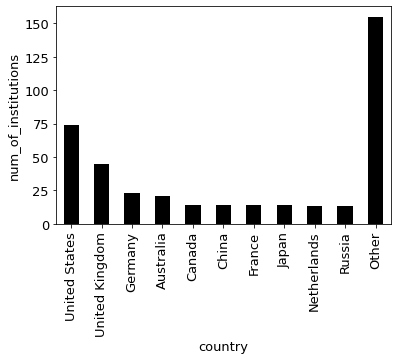

In [22]:
# create the bar plot using the DataFrame 'num_institutions'
all_df = pd.read_sql("""SELECT `country`, COUNT(`institution_name`) AS `num_of_institutions`  
                                        FROM rankings WHERE `year` = 2020 GROUP BY `country` 
                                        ORDER BY `num_of_institutions` DESC, `country` ASC""", conn)

top_10_df = pd.read_sql("""SELECT `country`, COUNT(`institution_name`) AS `num_of_institutions`  
                                        FROM rankings WHERE `year` = 2020 GROUP BY `country` 
                                        ORDER BY `num_of_institutions` DESC, `country` ASC LIMIT 10""", conn)

sum_of_other_countries = all_df["num_of_institutions"].iloc[10:].sum()

num_institutions = top_10_df.append({"country": "Other", "num_of_institutions": sum_of_other_countries}, ignore_index=True)

bar_plot(num_institutions, "country", "num_of_institutions")

# TODO: use a SQL query similar to q3 to get the number of institutions of all countries
#       (not just the top 10), ordered by the number of institutions, and store in a DataFrame
# TODO: Use pandas to find the sum of the institutions in all countries except the top 10
# TODO: create a new dictionary with the data about the new row that needs to be added
# TODO: properly append this new dictionary to 'num_institutions' and update 'num_institutions'
# TODO: create a bar plot using 'num_institutions'

In [23]:
grader.check("q4")

q4 results: All test cases passed!

**Question 5:** What are the **top** *10* countries which had the **highest** *total* `overall_score` listed in the `year` *2019*?

The *total* `overall_score` of a `country` is defined as the **sum** of `overall_score` of **all** institutions in that `country`. You **must** display the columns `country` and `total_score`. The rows **must** be in *descending* order of `total_score`.

Your output **must** be a **DataFrame** that looks like this:

||**country**|**total_score**|
|---------|------|---------|
|**0**|United States|4298.4|
|**1**|United Kingdom|2539.2|
|**2**|Germany|1098.2|
|**3**|Australia|1093.8|
|**4**|Japan|752.9|
|**5**|China|743.4|
|**6**|Canada|705.3|
|**7**|Netherlands|674.9|
|**8**|South Korea|612.8|
|**9**|France|595.2|

In [24]:
# compute and store the answer in the variable 'top_10_total_score', then display it
top_10_total_score = pd.read_sql("""SELECT `country`, SUM(`overall_score`) AS `total_score`  
                                        FROM rankings WHERE `year` = 2019 GROUP BY `country` 
                                        ORDER BY `total_score` DESC LIMIT 10""", conn)
top_10_total_score

,country,total_score
0,United States,4298.4
1,United Kingdom,2539.2
2,Germany,1098.2
3,Australia,1093.8
4,Japan,752.9
5,China,743.4
6,Canada,705.3
7,Netherlands,674.9
8,South Korea,612.8
9,France,595.2


In [25]:
grader.check("q5")

q5 results: All test cases passed!

**Question 6:** Using the data from q5, create a **bar plot** with the `country` on the **x-axis** and the `total_score` on the **y-axis**.

You **must** plot the data for the **top** *10* countries in the database. Unlike q4, you do **not** have to compute the `total_score` of the other countries.

You have **already** computed the **DataFrame** `top_10_total_score` containing the **country**, and the **total_score** data. Now, you **must** use `bar_plot` function to plot this data.

**Important Warning:** `p13_test.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. Your plots will be **manually graded**, and you will **lose points** if your plot is not visible, or if it is not properly labelled.

Your plot should look like this:

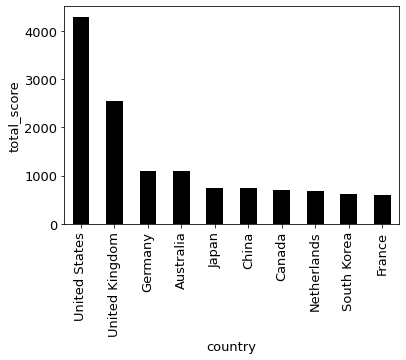

In [26]:
# create the bar plot using the DataFrame 'top_10_total_score'
bar_plot(top_10_total_score, "country", "total_score")

In [27]:
grader.check("q6")

q6 results: All test cases passed!

**Question 7:** What are the **top** *10* institutions in the *United States* which had the **highest** *international_score* in the `year` *2020*?

The *international_score* of an institution is defined as the **sum** of `international_faculty` and `international_students` scores of that institution. You **must** display the columns `institution_name` and `international_score`. The rows **must** be in *descending* order of `international_score`.

Your output **must** be a **DataFrame** that looks like this:

||**institution_name**|**international_score**|
|---------|------|---------|
|**0**|Massachusetts Institute Of Technology|194.1|
|**1**|California Institute Of Technology|186.7|
|**2**|Carnegie Mellon University|183.5|
|**3**|Rice University|180.4|
|**4**|Northeastern University|179.1|
|**5**|Stanford University|167.5|
|**6**|Cornell University|166.1|
|**7**|Purdue University|158.2|
|**8**|University Of Rochester|157.9|
|**9**|University Of Chicago|151.2|

In [28]:
# compute and store the answer in the variable 'top_10_inter_score', then display it
top_10_inter_score = pd.read_sql("""SELECT `institution_name`, (`international_faculty` + `international_students`) AS `international_score`  
                                        FROM rankings WHERE `year` = 2020 and `country` = "United States"
                                        ORDER BY `international_score` DESC LIMIT 10""", conn)
top_10_inter_score

,institution_name,international_score
0,Massachusetts Institute Of Technology,194.1
1,California Institute Of Technology,186.7
2,Carnegie Mellon University,183.5
3,Rice University,180.4
4,Northeastern University,179.1
5,Stanford University,167.5
6,Cornell University,166.1
7,Purdue University,158.2
8,University Of Rochester,157.9
9,University Of Chicago,151.2


In [29]:
grader.check("q7")

q7 results: All test cases passed!

**Question 8:** Create a **scatter plot** representing the `citations_per_faculty` (on the **x-axis**) against the `overall_score` (on the **y-axis**) of each institution in the `year` *2018*.

You **must** first compute a **DataFrame** `citations_overall` containing the **citations_per_faculty**, and the **overall_score** data from the `year` *2018*, of each **institution**. Then, you **must** use `scatter_plot` function to plot this data.


**Important Warning:** `p13_test.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. Your plots will be **manually graded**, and you will **lose points** if your plot is not visible, or if it is not properly labelled.

Your plot should look like this:

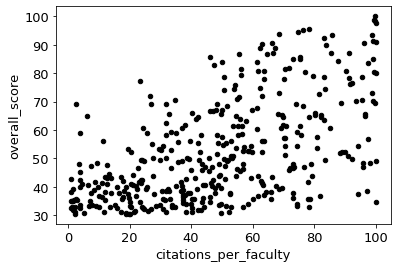

In [30]:
# first compute and store the DataFrame 'citations_overall'
# then create the scatter plot using the DataFrame
citations_overall = pd.read_sql("""SELECT `citations_per_faculty`, `overall_score`  
                                        FROM rankings WHERE `year` = 2018""", conn)
scatter_plot(citations_overall, "citations_per_faculty", "overall_score")

In [31]:
grader.check("q8")

q8 results: All test cases passed!

**Question 9:** Create a **scatter plot** representing the `academic_reputation` (on the **x-axis**) against the `employer_reputation` (on the **y-axis**) of each institution from the *United States* in the `year` *2019*.

You **must** first compute a **DataFrame** `reputations_usa` containing the **academic_reputation**, and the **employer_reputation** data from the `year` *2019*, of each **institution** in the `country` *United States*. Then, you **must** use `scatter_plot` function to plot this data.


**Important Warning:** `p13_test.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. Your plots will be **manually graded**, and you will **lose points** if your plot is not visible, or if it is not properly labelled.

Your plot should look like this:

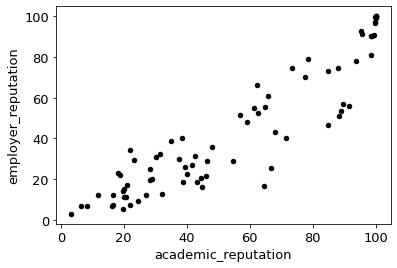

In [32]:
# first compute and store the DataFrame 'reputations_usa'
# then create the scatter plot using the DataFrame
reputations_usa = pd.read_sql("""SELECT `academic_reputation`, `employer_reputation`  
                                        FROM rankings WHERE `year` = 2019 AND `country` = "United States" """, conn)
scatter_plot(reputations_usa, "academic_reputation", "employer_reputation")

In [33]:
grader.check("q9")

q9 results: All test cases passed!

**Question 10:** Create a **scatter plot** representing the `international_students` (on the **x-axis**) against the `faculty_student_score` (on the **y-axis**) for the **top ranked** institution of **each** `country` in the `year` *2020*.

You **must** first compute a **DataFrame** `top_ranked_inter_faculty` containing the **international_students**, and the **faculty_student_score** data from the `year` *2020*, of the **top** ranked **institution** (i.e., the institution with the **least** `rank`) of each **country**. Then, you **must** use `scatter_plot` function to plot this data.

**Hint:** You can use the `MIN` SQL function to return the least value of a selected column. However, there are a few things to keep in mind while using this function.
* The function must be in **uppercase** (i.e., you must use `MIN`, and **not** `min`).
* The column you are finding the minimum of must be inside backticks (``` ` ```). For example, if you want to find the minimum `rank`, you need to say ```MIN(`rank`)```.

If you do not follow the syntax above, your code will likely fail.

**Important Warning:** `p13_test.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. Your plots will be **manually graded**, and you will **lose points** if your plot is not visible, or if it is not properly labelled.

Your plot should look like this:

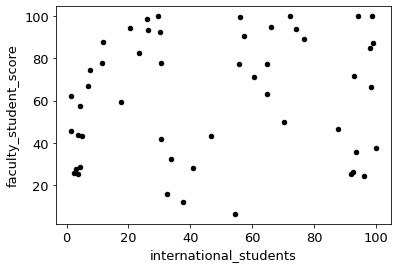

In [34]:
# first compute and store the DataFrame 'top_ranked_inter_faculty'
# then create the scatter plot using the DataFrame
top_ranked_inter_faculty = pd.read_sql("""SELECT `international_students`, `faculty_student_score`  
                                        FROM rankings WHERE `year` = 2020 
                                        GROUP BY `country` HAVING MIN(`rank`)""", conn)
scatter_plot(top_ranked_inter_faculty, "international_students", "faculty_student_score")

In [35]:
grader.check("q10")

q10 results: All test cases passed!

### Correlations:

You can use the `.corr()` method on a **DataFrame** that has **two** columns to get the *correlation* between those two columns.

For example, if we have a **DataFrame** `df` with the two columns `citations_per_faculty` and `overall_score`, `df.corr()` would return

||**citations_per_faculty**|**overall_score**|
|---------|------|---------|
|citations_per_faculty|1.000000|0.574472|
|overall_score|0.574472|1.000000|

You can use `.loc` here to **extract** the *correlation* between the two columns (`0.574472` in this case).

**Question 11:** Find the **correlation** between `international_students` and `overall_score` for institutions from the `country` *United Kingdom* that were ranked in the **top** *100* in the `year` *2020*.

Your output **must** be a **float** representing the absolute correlations. The **only** `pandas` operations you are **allowed** to use are: `.corr`, `.loc` and `.iloc`. You **must** use SQL to gather all other data.

In [36]:
# compute and store the answer in the variable 'uk_inter_score_corr', then display it
uk_inter_score = pd.read_sql("""SELECT `international_students`, `overall_score`  
                                        FROM rankings WHERE `year` = 2020 AND `country` = "United Kingdom" 
                                        AND `rank` <= 100""", conn)

uk_inter_score_corr = uk_inter_score.corr().iloc[1].loc["international_students"]
uk_inter_score_corr

0.5213253604130499

In [37]:
grader.check("q11")

q11 results: All test cases passed!

Let us now define a new score called `citations_per_international` as follows:

$$\texttt{citations}\_\texttt{per}\_\texttt{international} = \frac{\texttt{citations}\_\texttt{per}\_\texttt{faculty} \times \texttt{international}\_\texttt{faculty}}{100}.$$


**Question 12:** Find the **correlation** between `citations_per_international` and `overall_score` for **all** institutions in the `year` *2019*.

Your output **must** be a **float** representing the absolute correlations. The **only** `pandas` operations you are **allowed** to use are: `.corr`, `.loc` and `.iloc`. You **must** use SQL to gather all other data.

In [38]:
# compute and store the answer in the variable 'cit_per_inter_score_corr', then display it
cit_per_inter_score = pd.read_sql("""SELECT ((`citations_per_faculty` * `international_faculty`)/100) AS `citations_per_international`,
                                    `overall_score` FROM rankings WHERE `year` = 2019""", conn)

cit_per_inter_score_corr = cit_per_inter_score.corr().iloc[1].loc["citations_per_international"]
cit_per_inter_score_corr

0.557397228343763

In [39]:
grader.check("q12")

q12 results: All test cases passed!

**Question 13:** What are the **top** *15* countries with the **highest** *total* of `citations_per_international` in the `year` *2019*.


The *total* `citations_per_international` of a `country` is defined as the **sum** of `citations_per_international` scores of **all** institutions in that `country`. You **must** display the columns `country` and `sum_inter_citations`. The rows **must** be in *descending* order of `sum_inter_citations`.

Your output **must** be a **DataFrame** that looks like this:

||**country**|**sum_inter_citations**|
|----|-----------|-----------------------|
|**0**|United States|2623.8207|
|**1**|United Kingdom|2347.1602|
|**2**|Australia|1255.5530|
|**3**|Netherlands|748.4268|
|**4**|Canada|724.5029|
|**5**|Switzerland|561.8790|
|**6**|China|482.2577|
|**7**|Germany|455.5466|
|**8**|Hong Kong|375.3032|
|**9**|New Zealand|327.3357|
|**10**|Sweden|305.3745|
|**11**|Belgium|255.0750|
|**12**|France|198.0860|
|**13**|Denmark|186.4904|
|**14**|Singapore|160.3000|

In [40]:
# compute and store the answer in the variable 'top_cit_per_inter', then display it
top_cit_per_inter = pd.read_sql("""SELECT SUM((`citations_per_faculty` * `international_faculty`)/100) AS `sum_inter_citations`,
                                    `country` FROM rankings WHERE `year` = 2019 GROUP BY `country` ORDER BY `sum_inter_citations` DESC LIMIT 15""", conn)
top_cit_per_inter

,sum_inter_citations,country
0,2623.8207,United States
1,2347.1602,United Kingdom
2,1255.5530,Australia
3,748.4268,Netherlands
4,724.5029,Canada
5,561.8790,Switzerland
6,482.2577,China
7,455.5466,Germany
8,375.3032,Hong Kong
9,327.3357,New Zealand


In [41]:
grader.check("q13")

q13 results: All test cases passed!

**Question 14:** Among the institutions ranked within the **top** *300*, find the **average** `citations_per_international` for **each** `country` in the `year` *2019.

You **must** display the columns `country` and `avg_inter_citations` representing the **average** of `citations_per_international` for **each** country. The rows **must** be in *descending* order of `avg_inter_citations`.

**Hint:** To find the **average**, you can use `SUM()` and `COUNT()` or you can simply use `AVG()`.

Your output **must** be a **DataFrame** whose **first ten rows** look like this:

||**country**|**avg_inter_citations**|
|----|-----------|----------------------|
|**0**|Singapore|80.150000|
|**1**|Switzerland|75.497000|
|**2**|Hong Kong|62.550533|
|**3**|Australia|61.362388|
|**4**|Netherlands|56.166733|
|**5**|New Zealand|53.226220|
|**6**|United Kingdom|52.889084|
|**7**|Canada|50.779723|
|**8**|Denmark|46.196200|
|**9**|Norway|46.083300|

In [42]:
# compute and store the answer in the variable 'avg_cit_per_inter', then display it
avg_cit_per_inter = pd.read_sql("""SELECT `country`, AVG((`citations_per_faculty` * `international_faculty`)/100) AS `avg_inter_citations`
                                    FROM rankings WHERE `year` = 2019 AND rank <= 300 GROUP BY `country` ORDER BY `avg_inter_citations` DESC""", conn)
avg_cit_per_inter

,country,avg_inter_citations
0,Singapore,80.150000
1,Switzerland,75.497000
2,Hong Kong,62.550533
3,Australia,61.362388
4,Netherlands,56.166733
5,New Zealand,53.226220
6,United Kingdom,52.889084
7,Canada,50.779723
8,Denmark,46.196200
9,Norway,46.083300


In [43]:
grader.check("q14")

q14 results: All test cases passed!

**Question 15** Find the **institution** with the **highest** value of `citations_per_international` for **each** `country` in the `year` *2020*.

Your output **must** be a **DataFrame** with the columns `country`, `institution_name`, and a new column `max_inter_citations` representing the **maximum** value of `citations_per_international` for that country. The rows **must** be in *descending* order of `max_inter_citations`. You **must** **omit** rows where `max_inter_citations` is **missing** by using the clause:

```sql
HAVING `max_inter_citations` IS NOT NULL
```

**Hint:** You can use the `MAX()` function to return the largest value within a group.

Your output **must** be a **DataFrame** whose **first ten rows** look like this:

||**country**|**institution_name**|**max_inter_citations**|
|----|-----------|--------------------|----------------------|
|**0**|United States|Massachusetts Institute Of Technology|99.8000|
|**1**|Switzerland|Ecole Polytechnique Fédérale De Lausanne|98.9000|
|**2**|Netherlands|Eindhoven University Of Technology|95.4493|
|**3**|United Kingdom|London School Of Economics And Political Science|91.1000|
|**4**|Hong Kong|The Hong Kong University Of Science And Technology|89.5000|
|**5**|Singapore|Nanyang Technological University|88.8000|
|**6**|Australia|The University Of Western Australia|88.3000|
|**7**|Belgium|Katholieke Universiteit Leuven|76.7700|
|**8**|New Zealand|University Of Waikato|73.6434|
|**9**|Canada|Western University|72.3240|


In [44]:
# compute and store the answer in the variable 'max_cit_per_inter', then display it
max_cit_per_inter = pd.read_sql("""SELECT `country`, `institution_name`, MAX((`citations_per_faculty` * `international_faculty`)/100) AS `max_inter_citations`
                                    FROM rankings WHERE `year` = 2020 GROUP BY `country` HAVING `max_inter_citations` IS NOT NULL ORDER BY `max_inter_citations` DESC""", conn)
max_cit_per_inter

,country,institution_name,max_inter_citations
0,United States,Massachusetts Institute Of Technology,99.8000
1,Switzerland,Ecole Polytechnique Fédérale De Lausanne,98.9000
2,Netherlands,Eindhoven University Of Technology,95.4493
3,United Kingdom,London School Of Economics And Political Science,91.1000
4,Hong Kong,The Hong Kong University Of Science And Technology,89.5000
5,Singapore,Nanyang Technological University,88.8000
6,Australia,The University Of Western Australia,88.3000
7,Belgium,Katholieke Universiteit Leuven,76.7700
8,New Zealand,University Of Waikato,73.6434
9,Canada,Western University,72.3240


In [45]:
grader.check("q15")

q15 results: All test cases passed!

**Question 16**: Among the institutions ranked within the **top** *50*, create a **horizontal bar plot** representing the **average** of both the`citations_per_faculty` and `international_faculty` scores for **all** institutions in **each** `country` in the `year` *2018*.

You **must** first create a **DataFrame** `country_citations_inter` with **three** columns: `country`, `avg_citations` and `avg_inter_faculty` representing the name, the average value of `citations_per_faculty` and the average value of `international_faculty` for each country respectively.

Then, you **must** use the `horizontal_bar_plot` function to plot this data. You **must** ensure that the countries in the **horizontal bar plot** are **ordered** in **increasing** order of the **difference** between `avg_citations` and `avg_inter_faculty` by **appropriately ordering** the **DataFrame**.

**Important Warning:** `p13_test.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. Your plots will be **manually graded**, and you will **lose points** if your plot is not visible, or if it is not properly labelled.

Your plot should look like this:

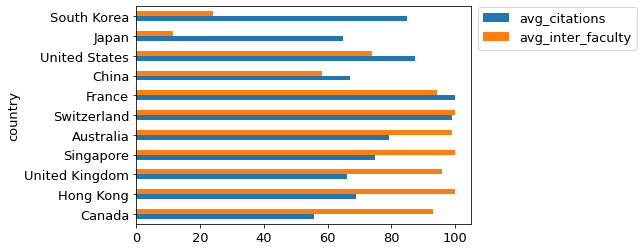

In [46]:
# first compute and store the DataFrame 'country_citations_inter'
# then create the horizontal bar plot using the DataFrame
country_citations_inter = pd.read_sql("""SELECT `country`, AVG(`citations_per_faculty`) AS `avg_citations`,
AVG(`international_faculty`) AS `avg_inter_faculty` FROM rankings WHERE `year` = 2018 AND `rank` <= 50 
GROUP BY `country` ORDER BY (`avg_citations` - `avg_inter_faculty`) ASC""", conn)
horizontal_bar_plot(country_citations_inter, "country")

In [47]:
grader.check("q16")

q16 results: All test cases passed!

**Question 17:** Create a **scatter plot** representing the `overall_score` (on the **x-axis**) against the `rank` (on the **y-axis**) for **all** institutions in the `year` *2020*. Additionally, **plot** a **regression line**.

You **must** first compute a **DataFrame** `overall_rank` containing the **overall_score**, and the **rank** data from the `year` *2020*. Then, you **must** use the `regression_line_plot` function to plot this data along with the regression line.

**Important Warning:** `p13_test.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. Your plots will be **manually graded**, and you will **lose points** if your plot is not visible, or if it is not properly labelled.

Your plot should look like this:

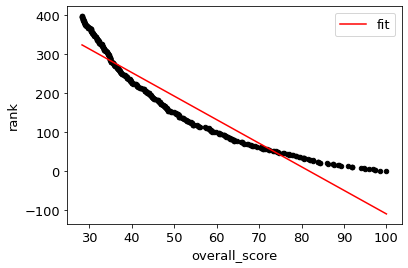

In [48]:
# first compute and store the DataFrame 'overall_rank'
# then create the scatter plot and the regression line using the DataFrame
overall_rank = pd.read_sql("""SELECT `overall_score`, `rank` FROM rankings WHERE `year` = 2020""", conn)
regression_line_plot(overall_rank, "overall_score", "rank")

In [49]:
grader.check("q17")

q17 results: All test cases passed!

**Food for thought:** Does our linear regression model fit the points well? It looks like the relationship between the `overall_score` and `rank` is **not quite linear**. In fact, a cursory look at the data suggests that the relationship is in fact, inverse.

**Question 18:** Create a **scatter plot** representing the **inverse** of the `overall_score` (on the **x-axis**) against the `rank` (on the **y-axis**) for **all** institutions in the `year` *2020*. Additionally, **plot** a **regression line**.

The `inverse_overall_score` for each institution is simply defined as `1/overall_score` for that institution. You **must** first compute a **DataFrame** `inverse_overall_rank` containing the **inverse_overall_score**, and the **rank** data from the `year` *2020*. You are **allowed** to use `pandas` operations to calculate the `inverse_overall_score`.

Then, you **must** use the `regression_line_plot` function to plot this data along with the regression line.

**Important Warning:** `p13_test.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. Your plots will be **manually graded**, and you will **lose points** if your plot is not visible, or if it is not properly labelled.

Your plot should look like this:

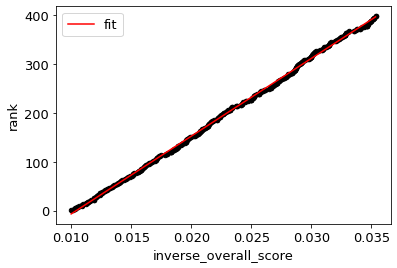

In [50]:
# first compute and store the DataFrame 'inverse_overall_rank'
# then create the scatter plot and the regression line using the DataFrame
inverse_overall_rank = pd.read_sql("""SELECT (1/`overall_score`) as `inverse_overall_score`, `rank` FROM rankings WHERE `year` = 2020""", conn)
regression_line_plot(inverse_overall_rank, "inverse_overall_score", "rank")

In [51]:
grader.check("q18")

q18 results: All test cases passed!

This seems to be much better! Let us now use this **regression line** to **estimate** the `rank` of an institution given its `overall_score`.

**Question 19:** Use the regression line to **estimate** the `rank` of an institution with an `overall_score` of *72*.

Your output **must** be an **int**. If your **estimate** is a **float**, *round it up* using `math.ceil`.


**Hints:**
1. Use the coefficients `m, b` that `get_regression_coeff` returns in q18. You can make another call to `get_regression_coeff` if needed.
2. Recall that the equation of a line is `y = m * x + b`. What are `x` and `y` here?

In [52]:
# compute and store the answer in the variable 'rank_score_72', then display it
m = get_regression_coeff(inverse_overall_rank, "inverse_overall_score", "rank")[0]
b = get_regression_coeff(inverse_overall_rank, "inverse_overall_score", "rank")[1]
rank_score_72 = math.ceil(m * (1/72) + b)
rank_score_72

56

In [53]:
grader.check("q19")

q19 results: All test cases passed!

**Food for thought:** Can you find out the `overall_score` of the university with this `rank` in the `year` *2020*? Does it match your prediction?

**Question 20:** Using the data from q4, create a **pie plot** representing the number of institutions from each country.


You **have** already computed a **DataFrame** `num_institutions` (in q4) containing the **country**, and the **num_of_institutions** data. Now, you **must** create a **pie plot** with this data. The **colors** do **not** matter, but the plot **must** be titled `Number of institutions`, and **must** be labelled as in the sample output below.

**Important Warning:** `p13_test.py` can check that the **DataFrame** is correct, but it **cannot** check if your plot appears on the screen, or whether the axes are correctly labelled. Your plots will be **manually graded**, and you will **lose points** if your plot is not visible, or if it is not properly labelled.

Your plot should look like this:

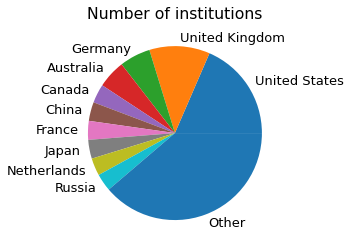

In [54]:
# create the pie plot using the DataFrame 'num_institutions'
pie_plot(num_institutions, "country", "num_of_institutions", title="Number of institutions")

In [55]:
grader.check("q20")

q20 results: All test cases passed!

**Food for thought:** It seems that we'll run out of colors! How can we make it so that **no two neighbors share a color**? You'll probably have to look online.

### Closing the database connection:

Now, before you **submit** your notebook, you **must** **close** your connection `conn`. Not doing this might make **Gradescope fail**. Please do this right away and save your precious time.

In [56]:
# close your connection here
conn.close()

## Submission
Make sure you have run all cells in your notebook in order before running the following cells, so that all images/graphs appear in the output.
It is recommended that at this stage, you Restart and Run all Cells in your notebook.
That will automatically save your work and generate a zip file for you to submit.

You will have to delete the images that we have provided in this notebook as examples, to execute the last cell.
Make sure you do not delete your own output.

**SUBMISSION INSTRUCTIONS**:
1. **Upload** the zipfile to Gradescope.
2. Check **Gradescope otter** results as soon as the auto-grader execution gets completed. Don't worry about the score showing up as -/100.0. You only need to check that the test cases passed.

In [57]:
# running this cell will create a new save checkpoint for your notebook
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))

<IPython.core.display.Javascript object>

In [58]:
!jupytext --to py p13.ipynb

[jupytext] Reading p13.ipynb in format ipynb
[jupytext] Updating the timestamp of p13.py


In [59]:
p13_test.check_file_size("p13.ipynb")
grader.export(pdf=False, run_tests=True, files=[py_filename])

Running your submission against local test cases...

Your submission received the following results when run against available test cases:

    q1 results: All test cases passed!

    q2 results: All test cases passed!

    q3 results: All test cases passed!

    q4 results: All test cases passed!

    q5 results: All test cases passed!

    q6 results: All test cases passed!

    q7 results: All test cases passed!

    q8 results: All test cases passed!

    q9 results: All test cases passed!

    q10 results: All test cases passed!

    q11 results: All test cases passed!

    q12 results: All test cases passed!

    q13 results: All test cases passed!

    q14 results: All test cases passed!

    q15 results: All test cases passed!

    q16 results: All test cases passed!

    q17 results: All test cases passed!

    q18 results: All test cases passed!

    q19 results: All test cases passed!

    q20 results: All test cases passed!
